In [3]:
import pandas as pd, numpy as np, seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_excel("https://urban-data-catalog.s3.amazonaws.com/drupal-root-live/2020/06/08/NHGIS_District_data.xlsx")
df.describe()

,School ID,Children 5-17 (SAIPE Estimate),% Poverty (SAIPE Estimate),% Single Parent Estimate,% HHs With Vulnerable Job Estimate,% Crowded Conditions Estimate,% No Computer or Internet Estimate,% Children with Disability,% Linguistically Isolated Children
count,13314.000000,1.331400e+04,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000
mean,14203.053402,4.352696e+03,0.161928,0.300393,0.261315,0.025675,0.139781,0.057484,0.021687
std,15027.794484,1.819214e+04,0.094417,0.145567,0.062967,0.032945,0.118753,0.043084,0.048998
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3934.000000,4.450000e+02,0.091779,0.203241,0.226162,0.008020,0.054255,0.030859,0.000000
50%,9540.000000,1.263500e+03,0.147465,0.288236,0.261326,0.016885,0.112354,0.050691,0.000000
75%,20967.500000,3.458500e+03,0.214746,0.381736,0.295547,0.030664,0.191661,0.076047,0.020890
max,99997.000000,1.213005e+06,1.000000,1.000000,1.000000,0.558528,1.000000,1.000000,0.772727


In [5]:
#df.isna().sum()

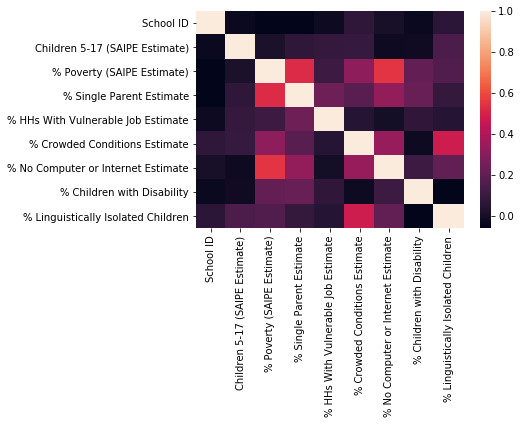

In [6]:
sns.heatmap(df.corr())

In [7]:
df.head()

,School ID,State,Geographic School District,Children 5-17 (SAIPE Estimate),% Poverty (SAIPE Estimate),% Single Parent Estimate,Single Parent Margin of Error,% HHs With Vulnerable Job Estimate,Vulnerable Job Margin of Error,% Crowded Conditions Estimate,HH With Crowded Conditions Margin of Error,% No Computer or Internet Estimate,No Computer or Internet Margin of Error,% Children with Disability,Children with Disability Margin of Error,% Linguistically Isolated Children,Linguistically Isolated Children Margin of Error
0,1,Alabama,Fort Rucker School District,985,0.124424,0.048975,0%-10%,0.327559,20%-46%,0.028090,0%-8%,0.020489,0%-5%,0.032487,0%-6%,0.000000,0%-3%
1,3,Alabama,Maxwell AFB School District,292,0.152263,0.101887,3%-17%,0.306513,4%-57%,0.009967,0%-10%,0.014528,0%-6%,0.054795,2%-9%,0.000000,0%-8%
2,5,Alabama,Albertville City School District,4591,0.300538,0.352926,26%-44%,0.326535,28%-37%,0.047664,3%-7%,0.221471,13%-32%,0.018079,0%-3%,0.173601,10%-24%
3,6,Alabama,Marshall County School District,8299,0.266222,0.295197,24%-35%,0.234867,21%-26%,0.026383,2%-3%,0.142486,11%-18%,0.043499,3%-6%,0.038679,1%-7%
4,7,Alabama,Hoover City School District,15397,0.072596,0.208316,17%-25%,0.292165,27%-31%,0.015485,1%-2%,0.031688,1%-5%,0.038774,2%-5%,0.044164,1%-8%


In [8]:
num_students = df.groupby('State')['Children 5-17 (SAIPE Estimate)'].sum()
num_students.sort_values(ascending=False).head()

State
California    8499898
Texas         5284763
Florida       3022429
New York      3010531
Illinois      2971890
Name: Children 5-17 (SAIPE Estimate), dtype: int64

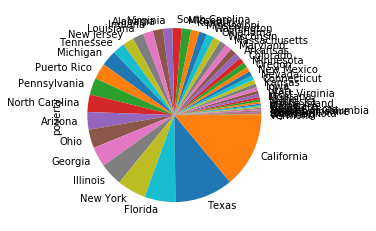

In [9]:
df['poverty'] = df['Children 5-17 (SAIPE Estimate)']*df['% Poverty (SAIPE Estimate)']
a = df.groupby('State')['poverty'].sum()/100
a = a.sort_values()
a.plot.pie()

<Figure size 432x288 with 0 Axes>

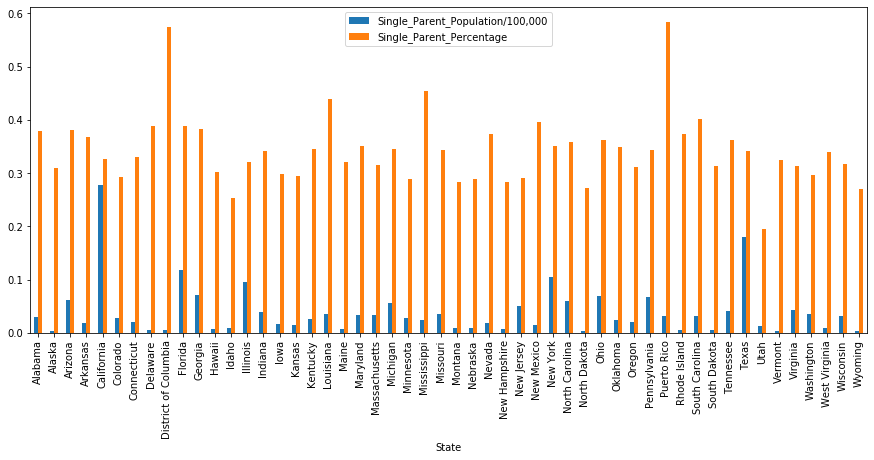

In [10]:
df['Single_Parent'] = df['Children 5-17 (SAIPE Estimate)']*df['% Single Parent Estimate']
b = df.groupby('State')['Single_Parent'].sum()
b1 = b/df.groupby('State')['Children 5-17 (SAIPE Estimate)'].sum()
Single_Parent = pd.concat([b/10000000,b1],axis = 1)
Single_Parent.columns = ['Single_Parent_Population/100,000','Single_Parent_Percentage']
plt.figure()
Single_Parent.plot(kind = 'bar',figsize = (15,6))

<Figure size 432x288 with 0 Axes>

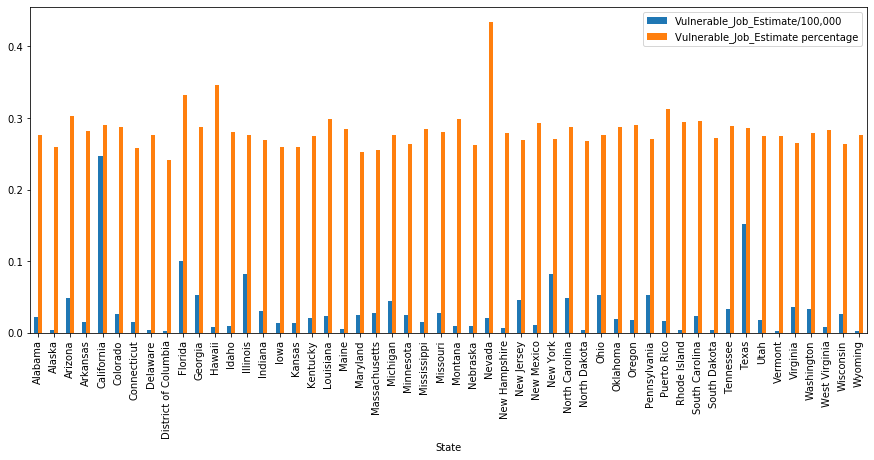

In [11]:
df['Vulnerable_Job'] = df['Children 5-17 (SAIPE Estimate)']*df['% HHs With Vulnerable Job Estimate']
c = df.groupby('State')['Vulnerable_Job'].sum()
c1 = c/df.groupby('State')['Children 5-17 (SAIPE Estimate)'].sum()
Vulnerable_Job_Estimate = pd.concat([c/10000000,c1],axis = 1)
Vulnerable_Job_Estimate.columns = ['Vulnerable_Job_Estimate/100,000', 'Vulnerable_Job_Estimate percentage']
plt.figure()
Vulnerable_Job_Estimate.plot(kind = 'bar', figsize = (15,6))

In [12]:
census = pd.read_csv('csvData.csv')
census = census.iloc[:,1:3]
census.head()

,State,Pop
0,California,39937500
1,Texas,29472300
2,Florida,21993000
3,New York,19440500
4,Pennsylvania,12820900


<Figure size 432x288 with 0 Axes>

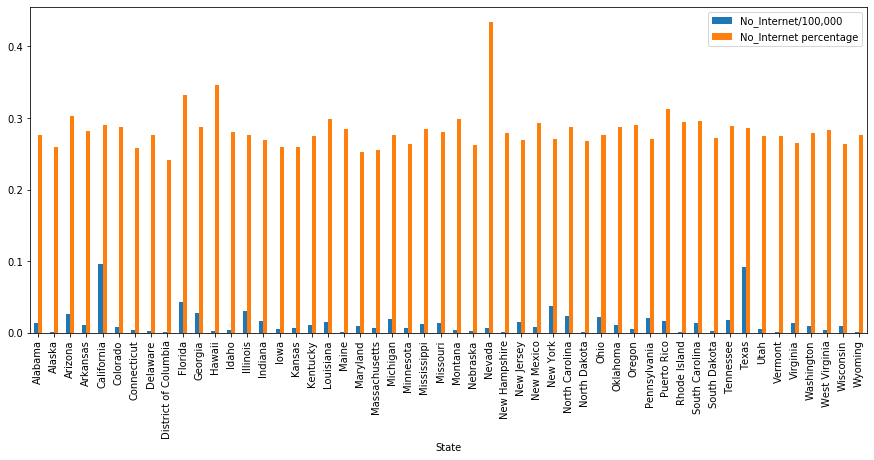

In [13]:
df['No_Internet'] = df['Children 5-17 (SAIPE Estimate)']*df['% No Computer or Internet Estimate']
d = df.groupby('State')['No_Internet'].sum()
d1 = c/df.groupby('State')['Children 5-17 (SAIPE Estimate)'].sum()
No_Internet = pd.concat([d/10000000,d1],axis = 1)
No_Internet.columns = ['No_Internet/100,000', 'No_Internet percentage']
plt.figure()
No_Internet.plot(kind = 'bar', figsize = (15,6))